## Understanding Cross Validation

In this practical we will rexplore several cross validation techniqeus and see how they can help us to train more robust supervised learning models.
For this exercise we will use two data files. 


datasets = breast_cancer()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix
from scipy import interp
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import StratifiedKFold


%matplotlib inline

### Some required data pre-processing

Here, you can load a small helper file, allowing to plot the learnt tree using a programme called graphviz.  
This library assume that graphviz is installed locally (which is true for the Jupyer Lab environment on bearportal)


In [5]:
# load the breast cancer dataset
cancer = datasets.load_breast_cancer()

# create a data frame from the cancer dataset
df = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],
                     columns= list(cancer['feature_names']) + ['target'])

# display the first few rows of the dataframe
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [7]:
# get the data and target from the dataset
X = cancer.data
y = cancer.target

# Binarize the output
y = label_binarize(y, classes=[0, 1])
n_classes = y.shape[1]


### K-Fold Cross validation

The K-Fold Cross Validation process starts by defining a model, in this case, logistic regression, and then setting up the cross-validation scheme using KFold from the `sklearn.model_selection` module. This method splits the dataset into 'k' different subsets or 'folds'. Here, we specify 5 folds (`n_splits=5`), shuffle the data before splitting (`shuffle=True`), and set a random state for reproducibility (`random_state=42`).

Next, we initialize empty lists to store the True Positive Rates (TPR) and Area Under the Curve (AUC) values for each fold, and an array with 100 evenly spaced values from 0 to 1 to represent the False Positive Rates (FPR) for the average ROC curve.

The main work takes place within a loop that iterates over each fold. In each iteration, the model is fitted on the training data and then used to predict probabilities for the test data. These probabilities, along with the true test labels, are used to compute the ROC curve metrics: FPR, TPR, and AUC.

For each fold, we compute a confusion matrix to evaluate the model's classification performance, and plot an ROC curve using the FPR and TPR. At the end of the loop, we plot the average ROC curve, summarizing the model's performance across all 'k' folds.

By averaging the performance over different subsets of the data, K-Fold Cross Validation provides a more robust estimate of the model's ability to generalize to unseen data, compared to using a single train-test split.

/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_275/2497354463.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr

Confusion Matrix for fold 0:
[[39  4]
 [ 1 70]]


/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_275/2497354463.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tru

Confusion Matrix for fold 1:
[[37  0]
 [ 2 75]]


/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_275/2497354463.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tru

Confusion Matrix for fold 2:
[[37  6]
 [ 3 68]]


/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/tmp/ipykernel_275/2497354463.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/home/mamun/miniconda3/envs/py38/lib/python3.8/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=Tru

Confusion Matrix for fold 3:
[[40  3]
 [ 1 70]]
Confusion Matrix for fold 4:
[[41  5]
 [ 4 63]]


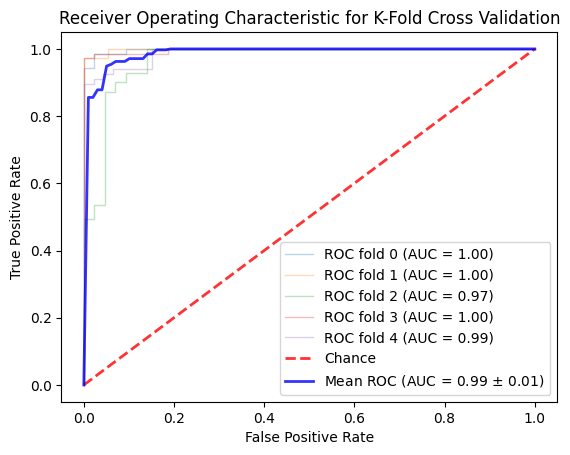

In [8]:
# define the model
model = LogisticRegression(max_iter=1000)

# define the KFold cross validation method
kfold = model_selection.KFold(n_splits=5, random_state=42, shuffle=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# K-Fold Cross Validation and plot ROC curves
for i, (train, test) in enumerate(kfold.split(X, y)):

    # fit the model
    model.fit(X[train], y[train])

    # predict the probabilities
    probs = model.predict_proba(X[test])

    # compute ROC curve and area under curve
    fpr, tpr, _ = roc_curve(y[test], probs[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # compute confusion matrix
    y_pred = model.predict(X[test])
    cm = confusion_matrix(y[test], y_pred)

    # plot ROC curve for the current fold
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # print confusion matrix
    print(f"Confusion Matrix for fold {i}:\n{cm}")

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for K-Fold Cross Validation')
plt.legend(loc="lower right")
plt.show()

### Example of K-Fold Cross VAlidation on Imbalanced Data

Now we see run K - Fold cross validation on an imbalanced  classification problem. 

In [15]:
# Define function to plot multiple ROC curves
def plot_multiple_roc(tprs, aucs, mean_fpr):
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")


In [16]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt
import numpy as np

# Create an imbalanced binary classification problem
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=2,
    n_redundant=10,
    n_classes=2,
    weights=[0.9, 0.1],  # 90% negative, 10% positive
    random_state=42,
)


In [17]:
## 

np.unique(y, return_counts=True)

(array([0, 1]), array([898, 102]))

For split 1, the confusion matrix is : 
 [[182   2]
 [  8   8]]

For split 2, the confusion matrix is : 
 [[174   7]
 [ 10   9]]

For split 3, the confusion matrix is : 
 [[175   4]
 [ 12   9]]

For split 4, the confusion matrix is : 
 [[173   4]
 [ 10  13]]

For split 5, the confusion matrix is : 
 [[174   3]
 [ 12  11]]



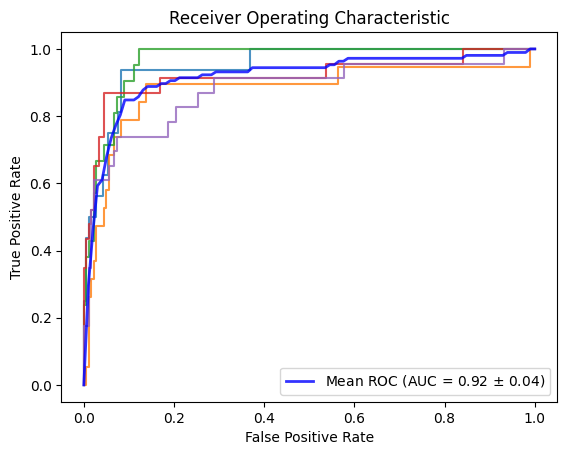

In [18]:

# Define the KFold cross-validation method
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

# Define the model - Logistic Regression
model = LogisticRegression()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
fig, ax = plt.subplots()

# Apply cross validation
for i, (train, test) in enumerate(kfold.split(X, y)):
    # Model fitting
    model.fit(X[train], y[train])

    # Calculate the probabilities on the test set
    y_score = model.predict_proba(X[test])[:, 1]
    fpr, tpr, _ = roc_curve(y[test], y_score)
    roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot(ax=ax, alpha=0.8)
    
    # Interpolate the TPR
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(auc(fpr, tpr))

    # Print confusion matrix for each split
    pred = model.predict(X[test])
    matrix = confusion_matrix(y[test], pred)
    print(f"For split {i+1}, the confusion matrix is : \n {matrix}\n")

# plot ROC for all folds and the mean ROC
plot_multiple_roc(tprs, aucs, mean_fpr)
plt.show()


### Leave One Out Cross Validation (LOOCV)

**Leave One Out Cross Validation (LOOCV)**:
In LOOCV, K (the number of folds) is equal to the number of observations in the dataset. This means that if you have N data points, the data is divided into N folds. The model is trained N times, each time using N-1 data points for training and leaving one data point for validation. So, in each iteration, a single observation is used as the validation set and all other observations are used as the training set.


In the Leave One Out Cross Validation (LOOCV) process, we begin by defining the model, which is logistic regression in this case. We then establish the cross-validation scheme using LeaveOneOut from the `sklearn.model_selection` module. This approach involves splitting the dataset into 'n' subsets or 'folds', where 'n' is the number of observations in the dataset. Essentially, each observation serves as its own test set, while the rest of the data forms the training set.

Next, we initialize empty lists to collect the True Positive Rates (TPR) and Area Under the Curve (AUC) scores from each iteration, and an array with 100 evenly spaced values from 0 to 1 to represent the False Positive Rates (FPR) for the average ROC curve.

The key steps are executed within a loop that cycles through each 'fold'. For each iteration, the model is trained on the majority of the data and used to predict probabilities for the single left-out test instance. These probabilities, alongside the true label of the test instance, are used to calculate the ROC curve metrics: FPR, TPR, and AUC.

During each iteration, a confusion matrix is computed to evaluate the model's performance, and an ROC curve is drawn using the FPR and TPR values. Following all iterations, the average ROC curve is plotted, encapsulating the model's overall performance across all 'n' folds.

LOOCV provides a nearly unbiased estimate of the model's ability to generalize to unseen data. However, it's computationally intensive, especially for large datasets, as it involves fitting the model 'n' times.


K-Fold Cross Validation and Leave One Out Cross Validation (LOOCV) are both types of cross-validation methods used to estimate the performance of a model on unseen data. They differ mainly in the number of splits of the data they use for training and validation.



**Differences**:
1. **Bias and Variance**: LOOCV has less bias than K-Fold as it uses almost all the data for training during each iteration. However, the results from LOOCV can be highly variable since the training sets in different iterations are very similar to each other. On the other hand, K-Fold has a bit more bias as it uses less data for training but its results are less variable.

2. **Computational Cost**: LOOCV can be computationally expensive especially for large datasets, as it requires fitting the model N times. In contrast, K-Fold requires fitting the model K times, where K is usually much less than N, and therefore is generally less computationally intensive.

3. **Performance Estimation**: In general, the performance estimation of LOOCV tends to be more optimistic as each test set is very small (only one observation), whereas K-Fold provides a more conservative estimation.

In practice, K-Fold Cross Validation (particularly with K=5 or K=10) is used more often due to its computational efficiency and less variance, while still providing a reliable estimate of model performance. LOOCV can still be a useful approach when dealing with very small datasets, where the reduction in training set size would significantly impact model performance.

In [ ]:
# define the model
model = LogisticRegression(max_iter=1000)

# define the LOOCV method
loocv = model_selection.LeaveOneOut()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Leave One Out Cross Validation and plot ROC curves
for i, (train, test) in enumerate(loocv.split(X, y)):

    # fit the model
    model.fit(X[train], y[train])

    # predict the probabilities
    probs = model.predict_proba(X[test])

    # compute ROC curve and area under curve
    fpr, tpr, _ = roc_curve(y[test], probs[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # compute confusion matrix
    y_pred = model.predict(X[test])
    cm = confusion_matrix(y[test], y_pred)
    # plot ROC curve for the current fold
    #plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC iteration %d (AUC = %0.2f)' % (i, roc_auc))

    # print confusion matrix
    print(f"Confusion Matrix for iteration {i}:\n{cm}")

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for LOOCV')
plt.legend(loc="lower right")
plt.show()


### Stratified Cross Validation:

Stratified Cross Validation is a variant of K-Fold Cross Validation that takes into account the distribution of classes within the data. This is particularly useful for datasets with a significant imbalance in the distribution of classes. 

Similar to K-Fold Cross Validation, we start by defining the model (in this case, logistic regression), and then specify the StratifiedKFold cross-validation scheme from the `sklearn.model_selection` module. This technique also splits the dataset into 'k' different subsets or 'folds'. Here, we have specified 5 folds (`n_splits=5`), shuffle the data before splitting (`shuffle=True`), and set a random state for reproducibility (`random_state=42`).

Next, we initialize empty lists to store the True Positive Rates (TPR) and Area Under the Curve (AUC) values for each fold, and an array with 100 evenly spaced values from 0 to 1 to represent the False Positive Rates (FPR) for the average ROC curve.

The main work takes place within a loop that iterates over each fold. In each iteration, the model is fitted on the training data and then used to predict probabilities for the test data. These probabilities, along with the true test labels, are used to compute the ROC curve metrics: FPR, TPR, and AUC. 

For each fold, we compute a confusion matrix to evaluate the model's classification performance, and plot an ROC curve using the FPR and TPR. At the end of the loop, we plot the average ROC curve, summarizing the model's performance across all 'k' folds.

Stratified Cross Validation vs. K-Fold Cross Validation:

The primary difference between Stratified Cross Validation and K-Fold Cross Validation lies in the way the folds are created.

In K-Fold Cross Validation, the data is split into 'k' folds without considering the class distribution. This means that it's possible to have a fold with a significant imbalance or even none of the instances of one class, especially when dealing with imbalanced datasets.

On the other hand, Stratified Cross Validation ensures that each fold is a good representative of the whole dataset by maintaining the same proportion of classes in each fold as they are in the whole dataset. This approach can lead to better performance and less biased estimations of the model's true performance, particularly with imbalanced datasets.

Hence, while K-Fold Cross Validation is a good general approach for evaluating model performance, Stratified Cross Validation is preferred when we have imbalanced classes to ensure that our cross-validation process reflects the true underlying distribution of the classes.

/tmp/ipykernel_275/1935513494.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_275/1935513494.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_275/1935513494.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Confusion Matrix for fold 0:
[[173   7]
 [  6  14]]
Confusion Matrix for fold 1:
[[179   1]
 [ 10  10]]
Confusion Matrix for fold 2:
[[175   5]
 [ 11   9]]
Confusion Matrix for fold 3:
[[174   5]
 [ 10  11]]


/tmp/ipykernel_275/1935513494.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
/tmp/ipykernel_275/1935513494.py:22: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))


Confusion Matrix for fold 4:
[[176   3]
 [ 12   9]]


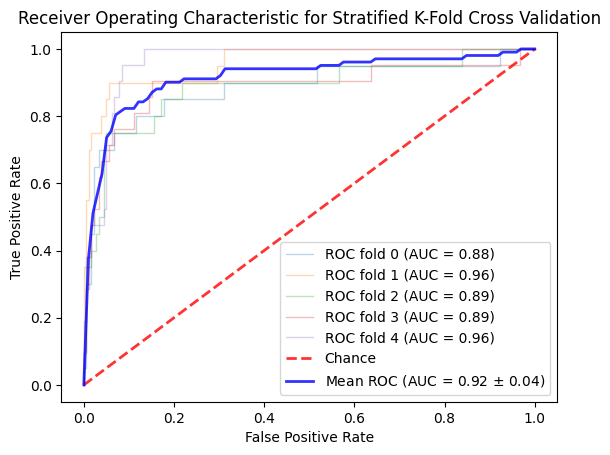

In [19]:
# define the model
model = LogisticRegression(max_iter=1000)

# define the StratifiedKFold method
skfold = model_selection.StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

# Stratified K-Fold Cross Validation and plot ROC curves
for i, (train, test) in enumerate(skfold.split(X, y)):

    # fit the model
    model.fit(X[train], y[train])

    # predict the probabilities
    probs = model.predict_proba(X[test])

    # compute ROC curve and area under curve
    fpr, tpr, _ = roc_curve(y[test], probs[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # compute confusion matrix
    y_pred = model.predict(X[test])
    cm = confusion_matrix(y[test], y_pred)

    # plot ROC curve for the current fold
    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    # print confusion matrix
    print(f"Confusion Matrix for fold {i}:\n{cm}")

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc), lw=2, alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Stratified K-Fold Cross Validation')
plt.legend(loc="lower right")
plt.show()


### Re-use the model on another dataset

